# LIBRARY


In [113]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import feature_selection
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# FUNCTION

In [110]:
def boxPlot(df, kolom_awal, kolom_akhir):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.iloc[:, kolom_awal:kolom_akhir], orient='h')
    df.shape

In [111]:
def multHistogram(df, n_rows, n_columns):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 5))

    # Menyusun histogram untuk setiap kolom dalam subplot
    for i, col in enumerate(df.columns):
        ax = axes.flatten()[i]
        ax.hist(df[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
        ax.set_title(col)
        ax.set_xlabel('Nilai')
        ax.set_ylabel('Frekuensi')

    # Menyesuaikan layout dan menampilkan plot
    plt.tight_layout()
    plt.show()

# DATA

In [213]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [214]:
df1 = pd.read_csv('train.csv')
df1.shape

(1309, 12)

In [215]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- survival = Survival = {0 = No, 1 = Yes}
- pclass = Ticket Class = {1 = 1st, 2 = 2nd, 3 = 3rd}
- sex = Sex
- Age = Age in years
- sibsp = # of siblings/spouses aboard the titanic
- parch = # of parents/childern aboard the titanic
- ticket = ticket number
- fare = passanger fare
- cabin = cabin number
- embarked = port of embarkation = {C = Cherbourg, Q = Queenstown, S = Southampton}

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [217]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# PRE-PROCESSING DATA

## DATA CLEANING

### DUPLICATED DATA HANDLING

In [218]:
df1.duplicated().sum()

0

### MISSING VALUE HANDLING

In [219]:
df1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### 1. Age

In [220]:
df1[df1['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Age dengan nilai NaN akan diisi dengan nilai rata-rata yang didasarkan pada sex, pertama akan dicari rata rata usia dengan sex pria dan wanita

In [221]:
m_male = df1['Age'].loc[df1['Sex'] == 'male'].mean()
m_female = df1['Age'].loc[df1['Sex'] == 'female'].mean()
print(f"male: {m_male},  female: {m_female}")

male: 30.58522796352584,  female: 28.68708762886598


Selanjutnya NaN diisi dengan mean yang sebelumnya sudah dicari

In [222]:
df2 = df1.copy()
df2['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [223]:
df2.loc[(df2['Age'].isnull() == True) & (df2['Sex'] == 'male'), 'Age'] = m_male
df2.loc[(df2['Age'].isnull() == True) & (df2['Sex'] == 'female'), 'Age'] = m_female
df2.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### 2. Cabin

Karena terlalu banyak data yang kosong, maka lebih baik di hapus

In [224]:
df3 = df2.drop(['Cabin'], axis='columns')
df3.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

#### 3. Embarked

In [225]:
df4 = df3.copy()

Dicari modus dari embarked untuk menggantikan nilai NaN

In [226]:
df4['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [227]:
df4['Embarked'].fillna('S', inplace=True)

In [228]:
df4.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

## DATA TRANSFORMATION

In [229]:
df5 = df4.copy()

In [230]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


Akan mengubah kolom dengan tipe data bukan numerik
1. Name (akan didrop karena tidak berguna dalam analisis)
2. Sex
3. Ticket (akan didrop karena tidak berguna dalam analisis)
4. Embarked

Menghapus kolom 'PassangerId', 'Name', dan 'Ticket' karena tidak berguna untuk analisis

In [231]:
df5 = df5.drop(['PassengerId', 'Name', 'Ticket'], axis='columns')

Transformasi data sex

In [232]:
df6 = df5.replace({
    "Sex" : {"male" : 0, "female":1}
})

Transformasi data Embarked

In [233]:
df7 = df6.replace({
    "Embarked" : {"S":0, "C":1, "Q":1}
})

In [234]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


## OUTLIER HANDLING

In [235]:
df8 = df7.copy()

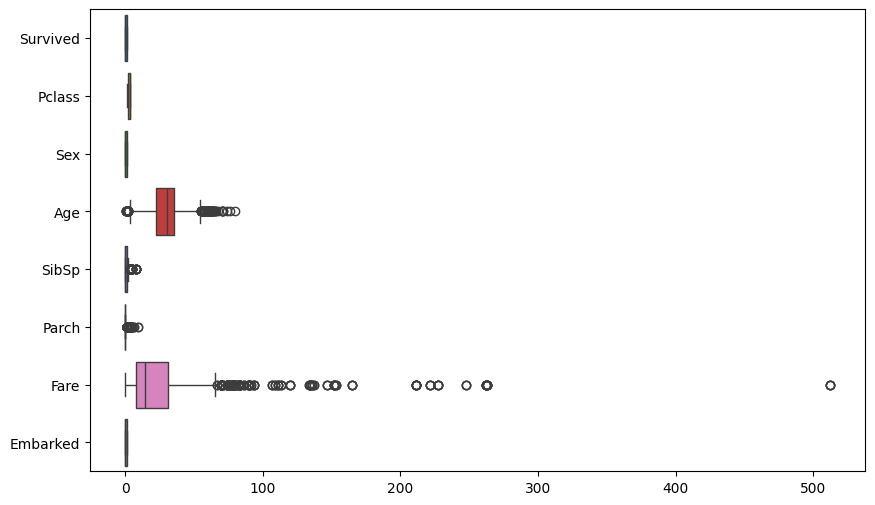

In [236]:
boxPlot(df8,0,8)

Terdapat outlier pada kolom
1. Age
2. SibSp & Parch
3. Fare

### Age

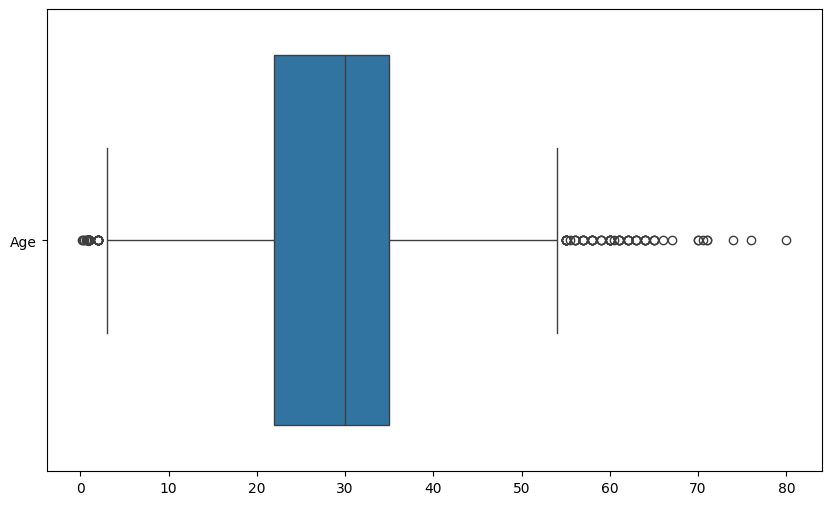

In [237]:
boxPlot(df8, 3,4)

Alih alih menghapus data outlier, kita mencoba membagi nilai age menjadi interval interval

Akan dilakukan analisis terlebig dahulu bagaimana data age akan dibagi

<Axes: >

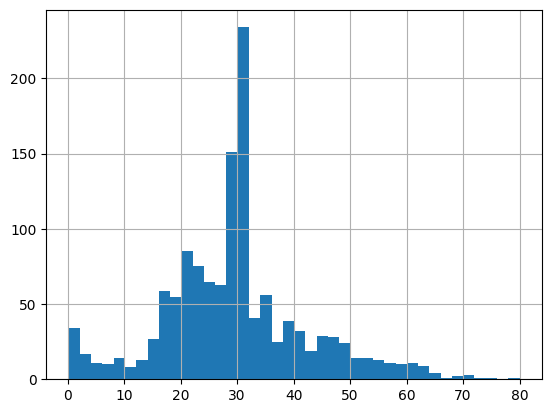

In [238]:
df8['Age'].hist(bins=40)

Karena label kita adalah survived, maka akan dilihat bagaimana pola 'Age' terhadap 'Survived'

<Axes: >

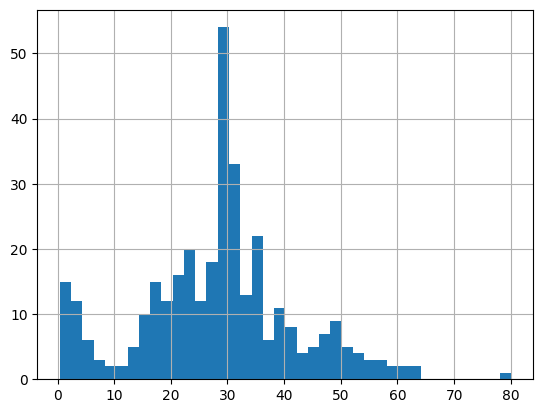

In [239]:
df8.loc[(df8['Survived'] == 1), 'Age'].hist(bins=40)

Terlihat pola usia:
1. 5-15 thn = tidak banyak yang selamat
3. 25-35 thn = lonjakan banyak yang selamat
4. 40-50 = tingkat keselamatan bervariasi
5. \>55 thn = tidak banyak yang selamat


Berdasarkan pola tersebut, Age akan dibagi menjadi beberapa interval

In [240]:
umur = [0,5,15,25,30,35,45,50,200]
umur_label = ['0-5','5-15','15-25','25-30','30-35','35-45','45-50','>50']
umur_interval = pd.cut(df8['Age'], umur, labels=umur_label)
df8['UmurInterval'] = umur_interval
df8['UmurInterval_code'] =  df8['UmurInterval'].cat.codes
df8

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,UmurInterval,UmurInterval_code
0,0.0,3,0,22.000000,1,0,7.2500,0,15-25,2
1,1.0,1,1,38.000000,1,0,71.2833,1,35-45,5
2,1.0,3,1,26.000000,0,0,7.9250,0,25-30,3
3,1.0,1,1,35.000000,1,0,53.1000,0,30-35,4
4,0.0,3,0,35.000000,0,0,8.0500,0,30-35,4
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,30.585228,0,0,8.0500,0,30-35,4
1305,NaN,1,1,39.000000,0,0,108.9000,1,35-45,5
1306,NaN,3,0,38.500000,0,0,7.2500,0,35-45,5
1307,NaN,3,0,30.585228,0,0,8.0500,0,30-35,4


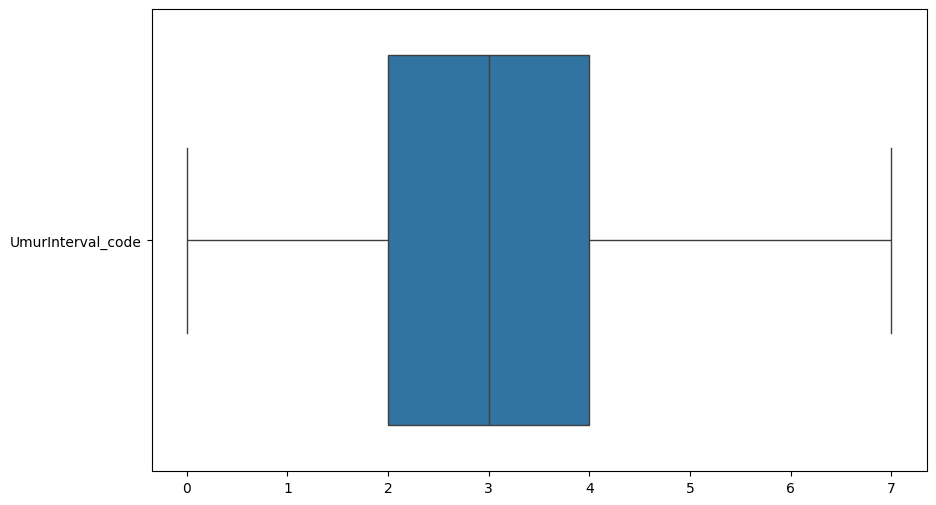

In [241]:
boxPlot(df8, 8,10)

### 2. SibSp & Parch

SibSp dan Parch merupakan banyak orang dalam rombongan. Dapat kita ringkas menjadi kolom baru yaitu 'JumlahOrang' dengan menjumlah keduanya dan ditambah 1 yaitu orang pemegang tiket

In [242]:
df9 = df8.copy()

In [243]:
jumlah_orang = df9['SibSp'].astype(int) + df9['Parch'].astype(int) + 1
df9['JumlahOrang'] = jumlah_orang.astype(int)
df9

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,UmurInterval,UmurInterval_code,JumlahOrang
0,0.0,3,0,22.000000,1,0,7.2500,0,15-25,2,2
1,1.0,1,1,38.000000,1,0,71.2833,1,35-45,5,2
2,1.0,3,1,26.000000,0,0,7.9250,0,25-30,3,1
3,1.0,1,1,35.000000,1,0,53.1000,0,30-35,4,2
4,0.0,3,0,35.000000,0,0,8.0500,0,30-35,4,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,30.585228,0,0,8.0500,0,30-35,4,1
1305,NaN,1,1,39.000000,0,0,108.9000,1,35-45,5,1
1306,NaN,3,0,38.500000,0,0,7.2500,0,35-45,5,1
1307,NaN,3,0,30.585228,0,0,8.0500,0,30-35,4,1


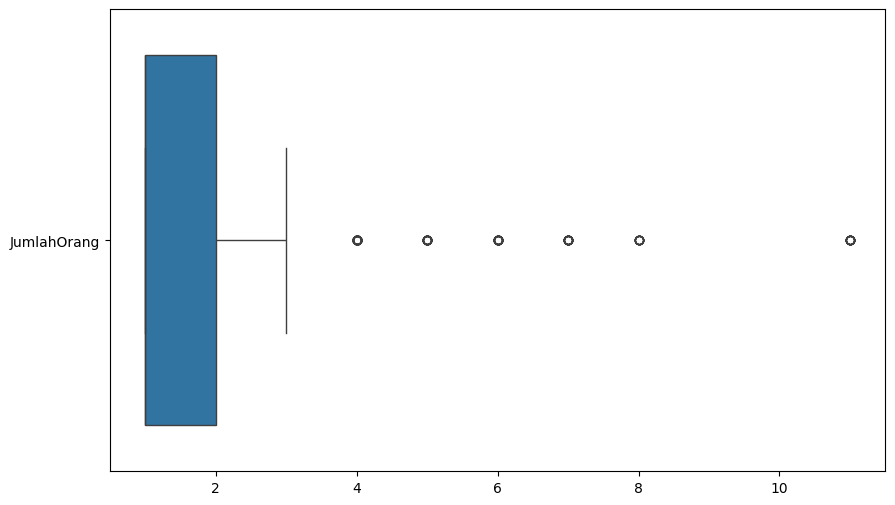

In [244]:
boxPlot(df9, 10,11)

<Axes: >

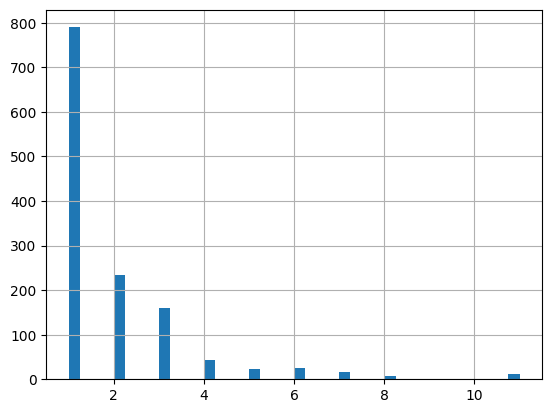

In [245]:
df9['JumlahOrang'].hist(bins=40)

### Fare


In [246]:
df10 = df9.copy()

<Axes: >

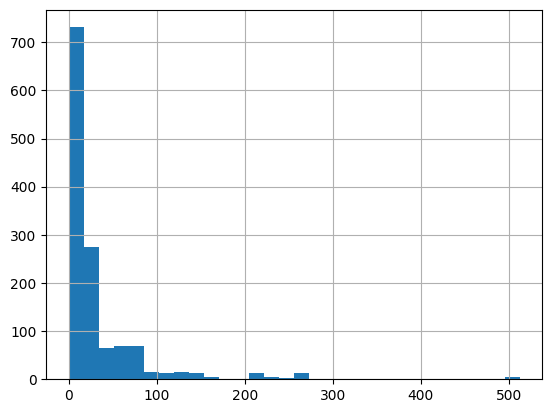

In [247]:
df10['Fare'].hist(bins=30)

Sama seperti age pada sebelumnya, kita bagi menjadi beberapa interval

In [248]:
harga = [0, 10, 30, 35, 80, 100]
harga_label = ['0-10', '10-30', '30-35','35-80','>80']
harga_interval = pd.cut(df10['Fare'], harga, labels=harga_label)
df10['HargaInterval'] = harga_interval
df10['HargaInterval_code'] = df10['HargaInterval'].cat.codes

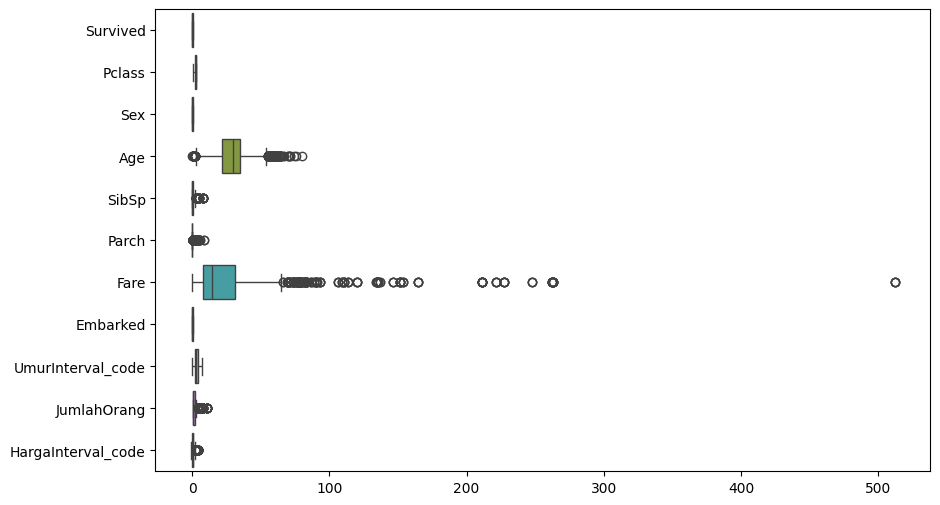

In [249]:
boxPlot(df10, 0,14)

Data kita anggap clear dan simpan ke df

In [250]:
df = df10.copy()

# EDA

In [251]:
X = df10[['Pclass','Sex','Embarked','UmurInterval_code','HargaInterval_code','JumlahOrang']]
y = df10['Survived']

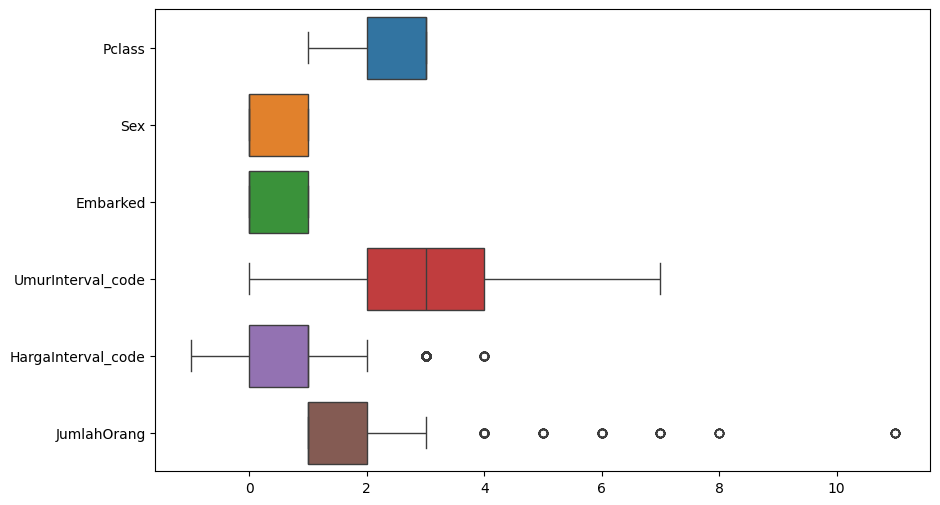

In [252]:
boxPlot(X,0,6)

_Sebenarnya masih ada outlier, tapi untuk saat ini kita biarkan dulu_

# MODELLING

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


In [254]:
from sklearn import naive_bayes

model = naive_bayes.GaussianNB()
model.fit(X_train,y_train)

ValueError: Input y contains NaN.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def evaluateModel(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1_score = metrics.f1_score(y_true, y_pred)
    auc = metrics.roc_auc_score(y_true, y_pred)

    # Specificity calculation
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Specificity': specificity,
        'AUC': auc
    }
    
    return metrics_dict

In [ ]:
evaluateModel(y_test, y_pred)

{'Accuracy': 0.8212290502793296,
 'Precision': 0.7402597402597403,
 'Recall': 0.8260869565217391,
 'F1 Score': 0.7808219178082192,
 'Specificity': 0.8181818181818182,
 'AUC': 0.8221343873517787}